In [66]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import time
%matplotlib inline
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import MinMaxScaler



from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import warnings

warnings.filterwarnings('ignore')

In [67]:
# ===== 1. CHARGER LE DATASET =====
# Reading and Understanding our Data
df = pd.read_csv(r"C:\Users\firas\Desktop\postings.csv", nrows=10000)

df.head(10)
df.tail()

,job_id,company_name,title,description,max_salary,pay_period,location,company_id,views,med_salary,...,skills_desc,listed_time,posting_domain,sponsored,work_type,currency,compensation_type,normalized_salary,zip_code,fips
9995,3886863612,The Job Network,Physical Therapist (PT) / Broomfield,Home Health Physical Therapist (PT)\n\nLocatio...,120000.0,YEARLY,"Broomfield, CO",167757.0,3.0,NaN,...,NaN,1.712658e+12,interimhealthcarestaffing-fortcollins.thejobne...,0,FULL_TIME,USD,BASE_SALARY,108500.0,80020.0,8013.0
9996,3886863627,Revature,Entry-Level Automotive Engineer,"About the RoleIn today's automotive landscape,...",NaN,NaN,"California, United States",10510386.0,3.0,NaN,...,NaN,1.712657e+12,NaN,0,FULL_TIME,NaN,NaN,NaN,NaN,NaN
9997,3886863633,The Job Network,Automation Technician,Summary\n\nPer Se is currently seeking an Entr...,NaN,NaN,"Minneapolis, MN",167757.0,4.0,NaN,...,NaN,1.712658e+12,persegroup.thejobnetwork.com,0,FULL_TIME,NaN,NaN,NaN,55401.0,27053.0
9998,3886863634,The Job Network,Service Technician,Pay: $18.50-30 Per Hour DOE\n\nLocation: Lovel...,30.0,HOURLY,"Loveland, CO",167757.0,4.0,NaN,...,NaN,1.712658e+12,expresspros.thejobnetwork.com,0,FULL_TIME,USD,BASE_SALARY,50440.0,80537.0,8069.0
9999,3886863643,The Job Network,Machine Operators; Louisa - Urgently Hiring al...,We are hiring Machine Operators - and Material...,18.0,HOURLY,"Louisa, VA",167757.0,5.0,NaN,...,NaN,1.712658e+12,expresspros.thejobnetwork.com,0,FULL_TIME,USD,BASE_SALARY,34320.0,23093.0,51109.0


In [68]:
#Caractere du Data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 31 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   job_id                      10000 non-null  int64  
 1   company_name                9714 non-null   object 
 2   title                       10000 non-null  object 
 3   description                 10000 non-null  object 
 4   max_salary                  2366 non-null   float64
 5   pay_period                  2921 non-null   object 
 6   location                    10000 non-null  object 
 7   company_id                  9715 non-null   float64
 8   views                       9946 non-null   float64
 9   med_salary                  555 non-null    float64
 10  min_salary                  2366 non-null   float64
 11  formatted_work_type         10000 non-null  object 
 12  applies                     2151 non-null   float64
 13  original_listed_time        1000

In [69]:
#Data Description
df.describe()


,job_id,max_salary,company_id,views,med_salary,min_salary,applies,original_listed_time,remote_allowed,expiry,closed_time,listed_time,sponsored,normalized_salary,zip_code,fips
count,1.000000e+04,2.366000e+03,9.715000e+03,9946.000000,555.000000,2366.000000,2151.000000,1.000000e+04,1325.0,1.000000e+04,4.400000e+01,1.000000e+04,10000.0,2.921000e+03,8341.000000,7810.000000
mean,3.850215e+09,8.528900e+04,1.413238e+07,17.182687,18451.833261,58200.228910,9.125523,1.712404e+12,1.0,1.715758e+12,1.712558e+12,1.712477e+12,0.0,2.748029e+05,52613.075770,28831.850064
std,2.911755e+08,1.018276e+05,2.695597e+07,118.939802,40316.112619,58949.327393,32.467129,4.780976e+08,0.0,2.983040e+09,3.822459e+08,2.550016e+08,0.0,9.908558e+06,30803.737662,16451.869134
min,9.217160e+05,7.250000e+00,1.009000e+03,1.000000,0.000000,1.000000,1.000000,1.701811e+12,1.0,1.712903e+12,1.712346e+12,1.712346e+12,0.0,0.000000e+00,1002.000000,1003.000000
25%,3.884804e+09,4.400000e+01,1.435200e+04,4.000000,19.500000,32.000000,1.000000,1.712349e+12,1.0,1.714944e+12,1.712353e+12,1.712351e+12,0.0,5.000000e+04,27560.000000,13051.000000
50%,3.884931e+09,7.530000e+04,4.688980e+05,5.000000,27.610000,59150.000000,2.000000,1.712373e+12,1.0,1.714968e+12,1.712360e+12,1.712376e+12,0.0,7.500000e+04,50307.000000,31021.000000
75%,3.885836e+09,1.300000e+05,1.063865e+07,9.000000,3151.000000,91940.000000,7.000000,1.712432e+12,1.0,1.715224e+12,1.712450e+12,1.712436e+12,0.0,1.165000e+05,80621.000000,42095.000000
max,3.886864e+09,1.500000e+06,1.031323e+08,8062.000000,400000.000000,540000.000000,967.000000,1.713572e+12,1.0,1.729124e+12,1.713464e+12,1.713572e+12,0.0,5.356000e+08,99901.000000,56039.000000


In [70]:
#The 'describe()' method is useful for understanding the central tendency, dispersion, and other summary statistics of a dataset column

In [71]:
#Nbr D'occurence du work_type
print(df['work_type'].value_counts())

work_type
FULL_TIME     8206
PART_TIME      797
CONTRACT       756
INTERNSHIP     123
TEMPORARY       65
OTHER           32
VOLUNTEER       21
Name: count, dtype: int64


In [72]:
#Nbr D'occurence du currency

print(df['currency'].value_counts())

currency
USD    2920
CAD       1
Name: count, dtype: int64


In [73]:
#Nbr D'occurence du compensation_type

print(df['compensation_type'].value_counts())

compensation_type
BASE_SALARY    2921
Name: count, dtype: int64


In [74]:
#Nbr D'occurence du title

print(df['title'].value_counts())

title
Sales Manager                                        117
Receptionist                                          75
Senior Software Engineer                              39
Auto Glass Installation Technician Trainee            30
Sales Associate                                       28
                                                    ... 
Skilled Maintenance Tool and Die Team Member TMMK      1
Physical Therapist (PT) / Broomfield                   1
Entry-Level Automotive Engineer                        1
Automation Technician                                  1
Mental Health Therapist/Counselor                      1
Name: count, Length: 7143, dtype: int64


In [75]:
#Eliminer les valeurs manquantes
#---Verifier des variables manquantes---
df.isnull().sum()

job_id                           0
company_name                   286
title                            0
description                      0
max_salary                    7634
pay_period                    7079
location                         0
company_id                     285
views                           54
med_salary                    9445
min_salary                    7634
formatted_work_type              0
applies                       7849
original_listed_time             0
remote_allowed                8675
job_posting_url                  0
application_url               3071
application_type                 0
expiry                           0
closed_time                   9956
formatted_experience_level    3309
skills_desc                   9947
listed_time                      0
posting_domain                3279
sponsored                        0
work_type                        0
currency                      7079
compensation_type             7079
normalized_salary   

In [76]:
#Compter combien de lignes sont dupliquées

df.duplicated().sum()

np.int64(0)

In [77]:
#  IDENTIFICATION DES COLONNES
# ==============================

# Colonnes numériques (quantitatives)
quant_cols_num = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

print(f"\nColonnes quantitatives détectées : {quant_cols_num}")


Colonnes quantitatives détectées : ['job_id', 'max_salary', 'company_id', 'views', 'med_salary', 'min_salary', 'applies', 'original_listed_time', 'remote_allowed', 'expiry', 'closed_time', 'listed_time', 'sponsored', 'normalized_salary', 'zip_code', 'fips']


In [78]:

# ==============================
# DÉTECTION OUTLIERS QUANTITATIFS
# ==============================

def detect_outliers_iqr(series, threshold=1.5):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - threshold * IQR
    upper = Q3 + threshold * IQR
    return (series < lower) | (series > upper)

outliers_quant = {}
print("\n=== DÉTECTION OUTLIERS QUANTITATIFS (IQR) ===")
for col in quant_cols_num :
    mask = detect_outliers_iqr(df[col])
    n_out = mask.sum()
    if n_out > 0:
        outliers_quant[col] = df[mask].index.tolist()
        print(f"{col}: {n_out} outliers détectés")
    else:
        print(f"{col}: Aucun outlier")


=== DÉTECTION OUTLIERS QUANTITATIFS (IQR) ===
job_id: 747 outliers détectés
max_salary: 31 outliers détectés
company_id: 1784 outliers détectés
views: 1449 outliers détectés
med_salary: 130 outliers détectés
min_salary: 26 outliers détectés
applies: 250 outliers détectés
original_listed_time: 2281 outliers détectés
remote_allowed: Aucun outlier
expiry: 1005 outliers détectés
closed_time: 11 outliers détectés
listed_time: 2172 outliers détectés
sponsored: Aucun outlier
normalized_salary: 101 outliers détectés
zip_code: Aucun outlier
fips: Aucun outlier


In [79]:
#Verifier presence des dupliques
df.index.is_unique

True

In [80]:
#True (pas de duplications)

In [81]:
#Handling the Missing Values

#Eliminer les valeurs manquantes
#---Verifier des variables manquantes---
df.isnull().sum()

job_id                           0
company_name                   286
title                            0
description                      0
max_salary                    7634
pay_period                    7079
location                         0
company_id                     285
views                           54
med_salary                    9445
min_salary                    7634
formatted_work_type              0
applies                       7849
original_listed_time             0
remote_allowed                8675
job_posting_url                  0
application_url               3071
application_type                 0
expiry                           0
closed_time                   9956
formatted_experience_level    3309
skills_desc                   9947
listed_time                      0
posting_domain                3279
sponsored                        0
work_type                        0
currency                      7079
compensation_type             7079
normalized_salary   

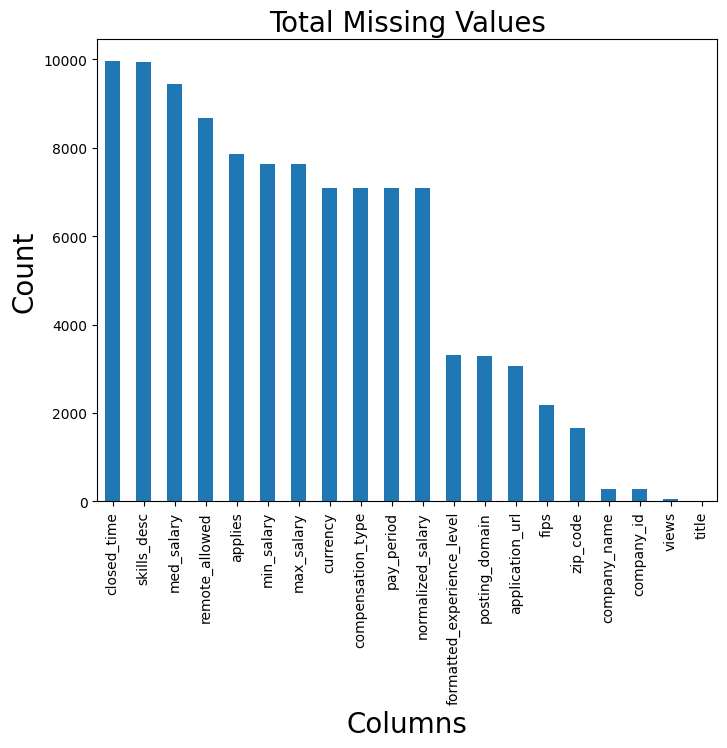

In [82]:
#Handling the Missing Values
#Finding the Missing Values

total = df.isnull().sum().sort_values(ascending=False)
total_select = total.head(20)
total_select.plot(kind="bar", figsize = (8,6), fontsize = 10)

plt.xlabel("Columns", fontsize = 20)
plt.ylabel("Count", fontsize = 20)
plt.title("Total Missing Values", fontsize = 20)
plt.show()

In [83]:
# Méthode 3 : avec pourcentage (encore plus parlant)
(df.isnull().sum() / len(df) * 100).sort_values(ascending=False)

closed_time                   99.56
skills_desc                   99.47
med_salary                    94.45
remote_allowed                86.75
applies                       78.49
min_salary                    76.34
max_salary                    76.34
currency                      70.79
compensation_type             70.79
pay_period                    70.79
normalized_salary             70.79
formatted_experience_level    33.09
posting_domain                32.79
application_url               30.71
fips                          21.90
zip_code                      16.59
company_name                   2.86
company_id                     2.85
views                          0.54
title                          0.00
job_id                         0.00
description                    0.00
location                       0.00
original_listed_time           0.00
formatted_work_type            0.00
application_type               0.00
expiry                         0.00
listed_time                 

In [84]:
df.describe()

,job_id,max_salary,company_id,views,med_salary,min_salary,applies,original_listed_time,remote_allowed,expiry,closed_time,listed_time,sponsored,normalized_salary,zip_code,fips
count,1.000000e+04,2.366000e+03,9.715000e+03,9946.000000,555.000000,2366.000000,2151.000000,1.000000e+04,1325.0,1.000000e+04,4.400000e+01,1.000000e+04,10000.0,2.921000e+03,8341.000000,7810.000000
mean,3.850215e+09,8.528900e+04,1.413238e+07,17.182687,18451.833261,58200.228910,9.125523,1.712404e+12,1.0,1.715758e+12,1.712558e+12,1.712477e+12,0.0,2.748029e+05,52613.075770,28831.850064
std,2.911755e+08,1.018276e+05,2.695597e+07,118.939802,40316.112619,58949.327393,32.467129,4.780976e+08,0.0,2.983040e+09,3.822459e+08,2.550016e+08,0.0,9.908558e+06,30803.737662,16451.869134
min,9.217160e+05,7.250000e+00,1.009000e+03,1.000000,0.000000,1.000000,1.000000,1.701811e+12,1.0,1.712903e+12,1.712346e+12,1.712346e+12,0.0,0.000000e+00,1002.000000,1003.000000
25%,3.884804e+09,4.400000e+01,1.435200e+04,4.000000,19.500000,32.000000,1.000000,1.712349e+12,1.0,1.714944e+12,1.712353e+12,1.712351e+12,0.0,5.000000e+04,27560.000000,13051.000000
50%,3.884931e+09,7.530000e+04,4.688980e+05,5.000000,27.610000,59150.000000,2.000000,1.712373e+12,1.0,1.714968e+12,1.712360e+12,1.712376e+12,0.0,7.500000e+04,50307.000000,31021.000000
75%,3.885836e+09,1.300000e+05,1.063865e+07,9.000000,3151.000000,91940.000000,7.000000,1.712432e+12,1.0,1.715224e+12,1.712450e+12,1.712436e+12,0.0,1.165000e+05,80621.000000,42095.000000
max,3.886864e+09,1.500000e+06,1.031323e+08,8062.000000,400000.000000,540000.000000,967.000000,1.713572e+12,1.0,1.729124e+12,1.713464e+12,1.713572e+12,0.0,5.356000e+08,99901.000000,56039.000000


In [85]:
df

,job_id,company_name,title,description,max_salary,pay_period,location,company_id,views,med_salary,...,skills_desc,listed_time,posting_domain,sponsored,work_type,currency,compensation_type,normalized_salary,zip_code,fips
0,921716,Corcoran Sawyer Smith,Marketing Coordinator,Job descriptionA leading real estate firm in N...,20.0,HOURLY,"Princeton, NJ",2774458.0,20.0,NaN,...,Requirements: \n\nWe are seeking a College or ...,1.713398e+12,NaN,0,FULL_TIME,USD,BASE_SALARY,38480.0,8540.0,34021.0
1,1829192,NaN,Mental Health Therapist/Counselor,"At Aspen Therapy and Wellness , we are committ...",50.0,HOURLY,"Fort Collins, CO",NaN,1.0,NaN,...,NaN,1.712858e+12,NaN,0,FULL_TIME,USD,BASE_SALARY,83200.0,80521.0,8069.0
2,10998357,The National Exemplar,Assitant Restaurant Manager,The National Exemplar is accepting application...,65000.0,YEARLY,"Cincinnati, OH",64896719.0,8.0,NaN,...,We are currently accepting resumes for FOH - A...,1.713278e+12,NaN,0,FULL_TIME,USD,BASE_SALARY,55000.0,45202.0,39061.0
3,23221523,"Abrams Fensterman, LLP",Senior Elder Law / Trusts and Estates Associat...,Senior Associate Attorney - Elder Law / Trusts...,175000.0,YEARLY,"New Hyde Park, NY",766262.0,16.0,NaN,...,This position requires a baseline understandin...,1.712896e+12,NaN,0,FULL_TIME,USD,BASE_SALARY,157500.0,11040.0,36059.0
4,35982263,NaN,Service Technician,Looking for HVAC service tech with experience ...,80000.0,YEARLY,"Burlington, IA",NaN,3.0,NaN,...,NaN,1.713452e+12,NaN,0,FULL_TIME,USD,BASE_SALARY,70000.0,52601.0,19057.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,3886863612,The Job Network,Physical Therapist (PT) / Broomfield,Home Health Physical Therapist (PT)\n\nLocatio...,120000.0,YEARLY,"Broomfield, CO",167757.0,3.0,NaN,...,NaN,1.712658e+12,interimhealthcarestaffing-fortcollins.thejobne...,0,FULL_TIME,USD,BASE_SALARY,108500.0,80020.0,8013.0
9996,3886863627,Revature,Entry-Level Automotive Engineer,"About the RoleIn today's automotive landscape,...",NaN,NaN,"California, United States",10510386.0,3.0,NaN,...,NaN,1.712657e+12,NaN,0,FULL_TIME,NaN,NaN,NaN,NaN,NaN
9997,3886863633,The Job Network,Automation Technician,Summary\n\nPer Se is currently seeking an Entr...,NaN,NaN,"Minneapolis, MN",167757.0,4.0,NaN,...,NaN,1.712658e+12,persegroup.thejobnetwork.com,0,FULL_TIME,NaN,NaN,NaN,55401.0,27053.0
9998,3886863634,The Job Network,Service Technician,Pay: $18.50-30 Per Hour DOE\n\nLocation: Lovel...,30.0,HOURLY,"Loveland, CO",167757.0,4.0,NaN,...,NaN,1.712658e+12,expresspros.thejobnetwork.com,0,FULL_TIME,USD,BASE_SALARY,50440.0,80537.0,8069.0


In [86]:
df["med_salary"].isnull().sum() #n'est pas necessaire pour notre objectif 

np.int64(9445)

In [87]:
df.drop("med_salary", axis=1, inplace=True) #supprimer totale la colonne med_salary 

# utilise drop(,axis) elle supprime mais n est pas direcetement dans dataFrame

In [88]:
print(df.columns.tolist())  # voir exactement les noms des colonnes

['job_id', 'company_name', 'title', 'description', 'max_salary', 'pay_period', 'location', 'company_id', 'views', 'min_salary', 'formatted_work_type', 'applies', 'original_listed_time', 'remote_allowed', 'job_posting_url', 'application_url', 'application_type', 'expiry', 'closed_time', 'formatted_experience_level', 'skills_desc', 'listed_time', 'posting_domain', 'sponsored', 'work_type', 'currency', 'compensation_type', 'normalized_salary', 'zip_code', 'fips']


In [89]:
#pas de med_salary

In [90]:
df.describe()

,job_id,max_salary,company_id,views,min_salary,applies,original_listed_time,remote_allowed,expiry,closed_time,listed_time,sponsored,normalized_salary,zip_code,fips
count,1.000000e+04,2.366000e+03,9.715000e+03,9946.000000,2366.000000,2151.000000,1.000000e+04,1325.0,1.000000e+04,4.400000e+01,1.000000e+04,10000.0,2.921000e+03,8341.000000,7810.000000
mean,3.850215e+09,8.528900e+04,1.413238e+07,17.182687,58200.228910,9.125523,1.712404e+12,1.0,1.715758e+12,1.712558e+12,1.712477e+12,0.0,2.748029e+05,52613.075770,28831.850064
std,2.911755e+08,1.018276e+05,2.695597e+07,118.939802,58949.327393,32.467129,4.780976e+08,0.0,2.983040e+09,3.822459e+08,2.550016e+08,0.0,9.908558e+06,30803.737662,16451.869134
min,9.217160e+05,7.250000e+00,1.009000e+03,1.000000,1.000000,1.000000,1.701811e+12,1.0,1.712903e+12,1.712346e+12,1.712346e+12,0.0,0.000000e+00,1002.000000,1003.000000
25%,3.884804e+09,4.400000e+01,1.435200e+04,4.000000,32.000000,1.000000,1.712349e+12,1.0,1.714944e+12,1.712353e+12,1.712351e+12,0.0,5.000000e+04,27560.000000,13051.000000
50%,3.884931e+09,7.530000e+04,4.688980e+05,5.000000,59150.000000,2.000000,1.712373e+12,1.0,1.714968e+12,1.712360e+12,1.712376e+12,0.0,7.500000e+04,50307.000000,31021.000000
75%,3.885836e+09,1.300000e+05,1.063865e+07,9.000000,91940.000000,7.000000,1.712432e+12,1.0,1.715224e+12,1.712450e+12,1.712436e+12,0.0,1.165000e+05,80621.000000,42095.000000
max,3.886864e+09,1.500000e+06,1.031323e+08,8062.000000,540000.000000,967.000000,1.713572e+12,1.0,1.729124e+12,1.713464e+12,1.713572e+12,0.0,5.356000e+08,99901.000000,56039.000000


In [91]:
df["skills_desc"].isnull().sum() #n'est pas necessaire pour notre objectif

np.int64(9947)

In [92]:
df.drop("skills_desc", axis=1,inplace=True) # supprimer totale du 'skills_desc'

In [93]:
print(df.columns.tolist())  # voir exactement les noms des colonnes

['job_id', 'company_name', 'title', 'description', 'max_salary', 'pay_period', 'location', 'company_id', 'views', 'min_salary', 'formatted_work_type', 'applies', 'original_listed_time', 'remote_allowed', 'job_posting_url', 'application_url', 'application_type', 'expiry', 'closed_time', 'formatted_experience_level', 'listed_time', 'posting_domain', 'sponsored', 'work_type', 'currency', 'compensation_type', 'normalized_salary', 'zip_code', 'fips']


In [94]:
df.describe() 

,job_id,max_salary,company_id,views,min_salary,applies,original_listed_time,remote_allowed,expiry,closed_time,listed_time,sponsored,normalized_salary,zip_code,fips
count,1.000000e+04,2.366000e+03,9.715000e+03,9946.000000,2366.000000,2151.000000,1.000000e+04,1325.0,1.000000e+04,4.400000e+01,1.000000e+04,10000.0,2.921000e+03,8341.000000,7810.000000
mean,3.850215e+09,8.528900e+04,1.413238e+07,17.182687,58200.228910,9.125523,1.712404e+12,1.0,1.715758e+12,1.712558e+12,1.712477e+12,0.0,2.748029e+05,52613.075770,28831.850064
std,2.911755e+08,1.018276e+05,2.695597e+07,118.939802,58949.327393,32.467129,4.780976e+08,0.0,2.983040e+09,3.822459e+08,2.550016e+08,0.0,9.908558e+06,30803.737662,16451.869134
min,9.217160e+05,7.250000e+00,1.009000e+03,1.000000,1.000000,1.000000,1.701811e+12,1.0,1.712903e+12,1.712346e+12,1.712346e+12,0.0,0.000000e+00,1002.000000,1003.000000
25%,3.884804e+09,4.400000e+01,1.435200e+04,4.000000,32.000000,1.000000,1.712349e+12,1.0,1.714944e+12,1.712353e+12,1.712351e+12,0.0,5.000000e+04,27560.000000,13051.000000
50%,3.884931e+09,7.530000e+04,4.688980e+05,5.000000,59150.000000,2.000000,1.712373e+12,1.0,1.714968e+12,1.712360e+12,1.712376e+12,0.0,7.500000e+04,50307.000000,31021.000000
75%,3.885836e+09,1.300000e+05,1.063865e+07,9.000000,91940.000000,7.000000,1.712432e+12,1.0,1.715224e+12,1.712450e+12,1.712436e+12,0.0,1.165000e+05,80621.000000,42095.000000
max,3.886864e+09,1.500000e+06,1.031323e+08,8062.000000,540000.000000,967.000000,1.713572e+12,1.0,1.729124e+12,1.713464e+12,1.713572e+12,0.0,5.356000e+08,99901.000000,56039.000000


In [95]:
# Vérifier s'il reste des NaN dans les colonnes catégorielles
print("Valeurs manquantes totales :")
print(df.isnull().sum().sum())

print("\nDétail par colonne :")
print(df.isnull().sum())


Valeurs manquantes totales :
84197

Détail par colonne :
job_id                           0
company_name                   286
title                            0
description                      0
max_salary                    7634
pay_period                    7079
location                         0
company_id                     285
views                           54
min_salary                    7634
formatted_work_type              0
applies                       7849
original_listed_time             0
remote_allowed                8675
job_posting_url                  0
application_url               3071
application_type                 0
expiry                           0
closed_time                   9956
formatted_experience_level    3309
listed_time                      0
posting_domain                3279
sponsored                        0
work_type                        0
currency                      7079
compensation_type             7079
normalized_salary             707

In [96]:
#replacer les valeurs manquantes min_salary et max_salary par l'imputation 
# min_salary  max_salary    

median=df["max_salary"].median()
median


np.float64(75300.0)

In [97]:
#replacer les valeurs manquantes min_salary et max_salary par l'imputation 
# min_salary  max_salary    

median1=df["min_salary"].median()
median1


np.float64(59150.0)

In [98]:
df["max_salary"].fillna(median, inplace = True)

In [99]:
df.tail()

,job_id,company_name,title,description,max_salary,pay_period,location,company_id,views,min_salary,...,formatted_experience_level,listed_time,posting_domain,sponsored,work_type,currency,compensation_type,normalized_salary,zip_code,fips
9995,3886863612,The Job Network,Physical Therapist (PT) / Broomfield,Home Health Physical Therapist (PT)\n\nLocatio...,120000.0,YEARLY,"Broomfield, CO",167757.0,3.0,97000.0,...,Entry level,1.712658e+12,interimhealthcarestaffing-fortcollins.thejobne...,0,FULL_TIME,USD,BASE_SALARY,108500.0,80020.0,8013.0
9996,3886863627,Revature,Entry-Level Automotive Engineer,"About the RoleIn today's automotive landscape,...",75300.0,NaN,"California, United States",10510386.0,3.0,NaN,...,Entry level,1.712657e+12,NaN,0,FULL_TIME,NaN,NaN,NaN,NaN,NaN
9997,3886863633,The Job Network,Automation Technician,Summary\n\nPer Se is currently seeking an Entr...,75300.0,NaN,"Minneapolis, MN",167757.0,4.0,NaN,...,Entry level,1.712658e+12,persegroup.thejobnetwork.com,0,FULL_TIME,NaN,NaN,NaN,55401.0,27053.0
9998,3886863634,The Job Network,Service Technician,Pay: $18.50-30 Per Hour DOE\n\nLocation: Lovel...,30.0,HOURLY,"Loveland, CO",167757.0,4.0,18.5,...,Entry level,1.712658e+12,expresspros.thejobnetwork.com,0,FULL_TIME,USD,BASE_SALARY,50440.0,80537.0,8069.0
9999,3886863643,The Job Network,Machine Operators; Louisa - Urgently Hiring al...,We are hiring Machine Operators - and Material...,18.0,HOURLY,"Louisa, VA",167757.0,5.0,15.0,...,Entry level,1.712658e+12,expresspros.thejobnetwork.com,0,FULL_TIME,USD,BASE_SALARY,34320.0,23093.0,51109.0


In [100]:
df["min_salary"].fillna(median, inplace = True)

In [101]:
df.tail()

,job_id,company_name,title,description,max_salary,pay_period,location,company_id,views,min_salary,...,formatted_experience_level,listed_time,posting_domain,sponsored,work_type,currency,compensation_type,normalized_salary,zip_code,fips
9995,3886863612,The Job Network,Physical Therapist (PT) / Broomfield,Home Health Physical Therapist (PT)\n\nLocatio...,120000.0,YEARLY,"Broomfield, CO",167757.0,3.0,97000.0,...,Entry level,1.712658e+12,interimhealthcarestaffing-fortcollins.thejobne...,0,FULL_TIME,USD,BASE_SALARY,108500.0,80020.0,8013.0
9996,3886863627,Revature,Entry-Level Automotive Engineer,"About the RoleIn today's automotive landscape,...",75300.0,NaN,"California, United States",10510386.0,3.0,75300.0,...,Entry level,1.712657e+12,NaN,0,FULL_TIME,NaN,NaN,NaN,NaN,NaN
9997,3886863633,The Job Network,Automation Technician,Summary\n\nPer Se is currently seeking an Entr...,75300.0,NaN,"Minneapolis, MN",167757.0,4.0,75300.0,...,Entry level,1.712658e+12,persegroup.thejobnetwork.com,0,FULL_TIME,NaN,NaN,NaN,55401.0,27053.0
9998,3886863634,The Job Network,Service Technician,Pay: $18.50-30 Per Hour DOE\n\nLocation: Lovel...,30.0,HOURLY,"Loveland, CO",167757.0,4.0,18.5,...,Entry level,1.712658e+12,expresspros.thejobnetwork.com,0,FULL_TIME,USD,BASE_SALARY,50440.0,80537.0,8069.0
9999,3886863643,The Job Network,Machine Operators; Louisa - Urgently Hiring al...,We are hiring Machine Operators - and Material...,18.0,HOURLY,"Louisa, VA",167757.0,5.0,15.0,...,Entry level,1.712658e+12,expresspros.thejobnetwork.com,0,FULL_TIME,USD,BASE_SALARY,34320.0,23093.0,51109.0


In [102]:
df

,job_id,company_name,title,description,max_salary,pay_period,location,company_id,views,min_salary,...,formatted_experience_level,listed_time,posting_domain,sponsored,work_type,currency,compensation_type,normalized_salary,zip_code,fips
0,921716,Corcoran Sawyer Smith,Marketing Coordinator,Job descriptionA leading real estate firm in N...,20.0,HOURLY,"Princeton, NJ",2774458.0,20.0,17.0,...,NaN,1.713398e+12,NaN,0,FULL_TIME,USD,BASE_SALARY,38480.0,8540.0,34021.0
1,1829192,NaN,Mental Health Therapist/Counselor,"At Aspen Therapy and Wellness , we are committ...",50.0,HOURLY,"Fort Collins, CO",NaN,1.0,30.0,...,NaN,1.712858e+12,NaN,0,FULL_TIME,USD,BASE_SALARY,83200.0,80521.0,8069.0
2,10998357,The National Exemplar,Assitant Restaurant Manager,The National Exemplar is accepting application...,65000.0,YEARLY,"Cincinnati, OH",64896719.0,8.0,45000.0,...,NaN,1.713278e+12,NaN,0,FULL_TIME,USD,BASE_SALARY,55000.0,45202.0,39061.0
3,23221523,"Abrams Fensterman, LLP",Senior Elder Law / Trusts and Estates Associat...,Senior Associate Attorney - Elder Law / Trusts...,175000.0,YEARLY,"New Hyde Park, NY",766262.0,16.0,140000.0,...,NaN,1.712896e+12,NaN,0,FULL_TIME,USD,BASE_SALARY,157500.0,11040.0,36059.0
4,35982263,NaN,Service Technician,Looking for HVAC service tech with experience ...,80000.0,YEARLY,"Burlington, IA",NaN,3.0,60000.0,...,NaN,1.713452e+12,NaN,0,FULL_TIME,USD,BASE_SALARY,70000.0,52601.0,19057.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,3886863612,The Job Network,Physical Therapist (PT) / Broomfield,Home Health Physical Therapist (PT)\n\nLocatio...,120000.0,YEARLY,"Broomfield, CO",167757.0,3.0,97000.0,...,Entry level,1.712658e+12,interimhealthcarestaffing-fortcollins.thejobne...,0,FULL_TIME,USD,BASE_SALARY,108500.0,80020.0,8013.0
9996,3886863627,Revature,Entry-Level Automotive Engineer,"About the RoleIn today's automotive landscape,...",75300.0,NaN,"California, United States",10510386.0,3.0,75300.0,...,Entry level,1.712657e+12,NaN,0,FULL_TIME,NaN,NaN,NaN,NaN,NaN
9997,3886863633,The Job Network,Automation Technician,Summary\n\nPer Se is currently seeking an Entr...,75300.0,NaN,"Minneapolis, MN",167757.0,4.0,75300.0,...,Entry level,1.712658e+12,persegroup.thejobnetwork.com,0,FULL_TIME,NaN,NaN,NaN,55401.0,27053.0
9998,3886863634,The Job Network,Service Technician,Pay: $18.50-30 Per Hour DOE\n\nLocation: Lovel...,30.0,HOURLY,"Loveland, CO",167757.0,4.0,18.5,...,Entry level,1.712658e+12,expresspros.thejobnetwork.com,0,FULL_TIME,USD,BASE_SALARY,50440.0,80537.0,8069.0


In [103]:
median2=df["normalized_salary"].median()
median2

np.float64(75000.0)

In [104]:
df["normalized_salary"].fillna(median, inplace = True)

In [105]:
df.tail()

,job_id,company_name,title,description,max_salary,pay_period,location,company_id,views,min_salary,...,formatted_experience_level,listed_time,posting_domain,sponsored,work_type,currency,compensation_type,normalized_salary,zip_code,fips
9995,3886863612,The Job Network,Physical Therapist (PT) / Broomfield,Home Health Physical Therapist (PT)\n\nLocatio...,120000.0,YEARLY,"Broomfield, CO",167757.0,3.0,97000.0,...,Entry level,1.712658e+12,interimhealthcarestaffing-fortcollins.thejobne...,0,FULL_TIME,USD,BASE_SALARY,108500.0,80020.0,8013.0
9996,3886863627,Revature,Entry-Level Automotive Engineer,"About the RoleIn today's automotive landscape,...",75300.0,NaN,"California, United States",10510386.0,3.0,75300.0,...,Entry level,1.712657e+12,NaN,0,FULL_TIME,NaN,NaN,75300.0,NaN,NaN
9997,3886863633,The Job Network,Automation Technician,Summary\n\nPer Se is currently seeking an Entr...,75300.0,NaN,"Minneapolis, MN",167757.0,4.0,75300.0,...,Entry level,1.712658e+12,persegroup.thejobnetwork.com,0,FULL_TIME,NaN,NaN,75300.0,55401.0,27053.0
9998,3886863634,The Job Network,Service Technician,Pay: $18.50-30 Per Hour DOE\n\nLocation: Lovel...,30.0,HOURLY,"Loveland, CO",167757.0,4.0,18.5,...,Entry level,1.712658e+12,expresspros.thejobnetwork.com,0,FULL_TIME,USD,BASE_SALARY,50440.0,80537.0,8069.0
9999,3886863643,The Job Network,Machine Operators; Louisa - Urgently Hiring al...,We are hiring Machine Operators - and Material...,18.0,HOURLY,"Louisa, VA",167757.0,5.0,15.0,...,Entry level,1.712658e+12,expresspros.thejobnetwork.com,0,FULL_TIME,USD,BASE_SALARY,34320.0,23093.0,51109.0


In [106]:
#Imputer le mediane dans normalized_salary

In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   job_id                      10000 non-null  int64  
 1   company_name                9714 non-null   object 
 2   title                       10000 non-null  object 
 3   description                 10000 non-null  object 
 4   max_salary                  10000 non-null  float64
 5   pay_period                  2921 non-null   object 
 6   location                    10000 non-null  object 
 7   company_id                  9715 non-null   float64
 8   views                       9946 non-null   float64
 9   min_salary                  10000 non-null  float64
 10  formatted_work_type         10000 non-null  object 
 11  applies                     2151 non-null   float64
 12  original_listed_time        10000 non-null  float64
 13  remote_allowed              1325

In [108]:
quant_cols_num = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
quant_cols_num

['job_id',
 'max_salary',
 'company_id',
 'views',
 'min_salary',
 'applies',
 'original_listed_time',
 'remote_allowed',
 'expiry',
 'closed_time',
 'listed_time',
 'sponsored',
 'normalized_salary',
 'zip_code',
 'fips']

In [109]:
df.describe()


,job_id,max_salary,company_id,views,min_salary,applies,original_listed_time,remote_allowed,expiry,closed_time,listed_time,sponsored,normalized_salary,zip_code,fips
count,1.000000e+04,1.000000e+04,9.715000e+03,9946.000000,10000.000000,2151.000000,1.000000e+04,1325.0,1.000000e+04,4.400000e+01,1.000000e+04,10000.0,1.000000e+04,8341.000000,7810.000000
mean,3.850215e+09,7.766340e+04,1.413238e+07,17.182687,71254.194160,9.125523,1.712404e+12,1.0,1.715758e+12,1.712558e+12,1.712477e+12,0.0,1.335748e+05,52613.075770,28831.850064
std,2.911755e+08,4.970420e+04,2.695597e+07,118.939802,29576.075975,32.467129,4.780976e+08,0.0,2.983040e+09,3.822459e+08,2.550016e+08,0.0,5.355326e+06,30803.737662,16451.869134
min,9.217160e+05,7.250000e+00,1.009000e+03,1.000000,1.000000,1.000000,1.701811e+12,1.0,1.712903e+12,1.712346e+12,1.712346e+12,0.0,0.000000e+00,1002.000000,1003.000000
25%,3.884804e+09,7.530000e+04,1.435200e+04,4.000000,75300.000000,1.000000,1.712349e+12,1.0,1.714944e+12,1.712353e+12,1.712351e+12,0.0,7.530000e+04,27560.000000,13051.000000
50%,3.884931e+09,7.530000e+04,4.688980e+05,5.000000,75300.000000,2.000000,1.712373e+12,1.0,1.714968e+12,1.712360e+12,1.712376e+12,0.0,7.530000e+04,50307.000000,31021.000000
75%,3.885836e+09,7.530000e+04,1.063865e+07,9.000000,75300.000000,7.000000,1.712432e+12,1.0,1.715224e+12,1.712450e+12,1.712436e+12,0.0,7.530000e+04,80621.000000,42095.000000
max,3.886864e+09,1.500000e+06,1.031323e+08,8062.000000,540000.000000,967.000000,1.713572e+12,1.0,1.729124e+12,1.713464e+12,1.713572e+12,0.0,5.356000e+08,99901.000000,56039.000000


In [110]:
# 2. Vérifier min_salary et max_salary séparément
print("\n=== MIN SALARY ===")
print(df['min_salary'].describe())
print("\n=== MAX SALARY ===")
print(df['max_salary'].describe())



=== MIN SALARY ===
count     10000.000000
mean      71254.194160
std       29576.075975
min           1.000000
25%       75300.000000
50%       75300.000000
75%       75300.000000
max      540000.000000
Name: min_salary, dtype: float64

=== MAX SALARY ===
count    1.000000e+04
mean     7.766340e+04
std      4.970420e+04
min      7.250000e+00
25%      7.530000e+04
50%      7.530000e+04
75%      7.530000e+04
max      1.500000e+06
Name: max_salary, dtype: float64


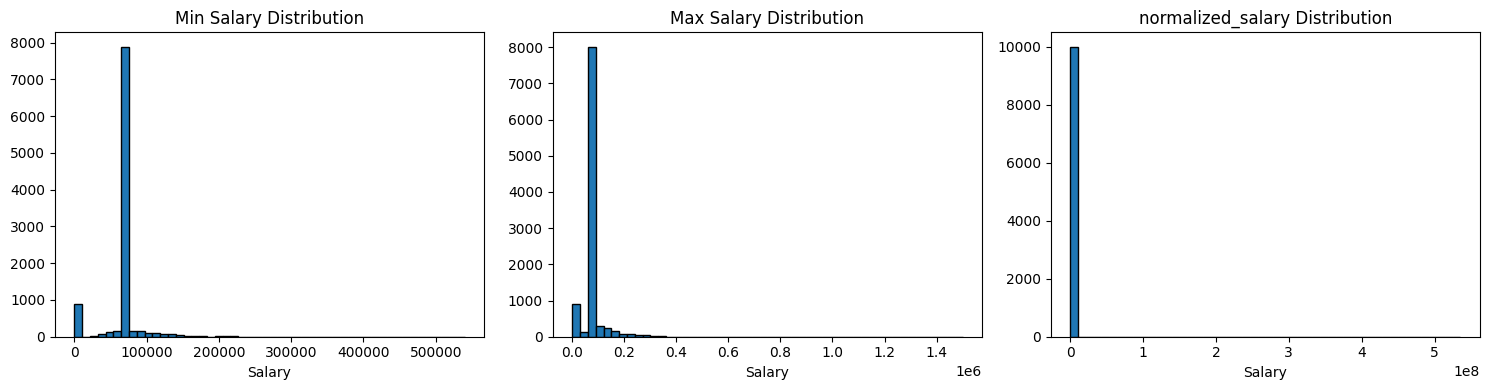

In [111]:

# 4. Visualiser la distribution
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 3, figsize=(15, 4))

axes[0].hist(df['min_salary'], bins=50, edgecolor='black')
axes[0].set_title('Min Salary Distribution')
axes[0].set_xlabel('Salary')

axes[1].hist(df['max_salary'], bins=50, edgecolor='black')
axes[1].set_title('Max Salary Distribution')
axes[1].set_xlabel('Salary')

axes[2].hist(df['normalized_salary'].dropna(), bins=50, edgecolor='black')
axes[2].set_title('normalized_salary Distribution')
axes[2].set_xlabel('Salary')

plt.tight_layout()
plt.show()

In [112]:
# Créer salary_annual
df['salary_annual'] = (df['min_salary'] + df['max_salary']) / 2

# Nettoyer les données
df_clean = df[
    # Exclure les imputations
    (df['min_salary'] != 59150) &
    (df['max_salary'] != 75300) &
    # Exclure les valeurs aberrantes
    (df['salary_annual'] >= 20000) & 
    (df['salary_annual'] <= 500000)
].copy()

# Vérifier le résultat
print(f"Lignes originales: {len(df)}")
print(f"Lignes nettoyées: {len(df_clean)} ({len(df_clean)/len(df)*100:.1f}%)")
print("\n=== Statistiques des salaires nettoyés ===")
print(df_clean['salary_annual'].describe())

Lignes originales: 10000
Lignes nettoyées: 1469 (14.7%)

=== Statistiques des salaires nettoyés ===
count      1469.000000
mean     112723.347733
std       56459.275460
min       20000.500000
25%       72500.000000
50%      100000.000000
75%      137500.000000
max      475000.000000
Name: salary_annual, dtype: float64


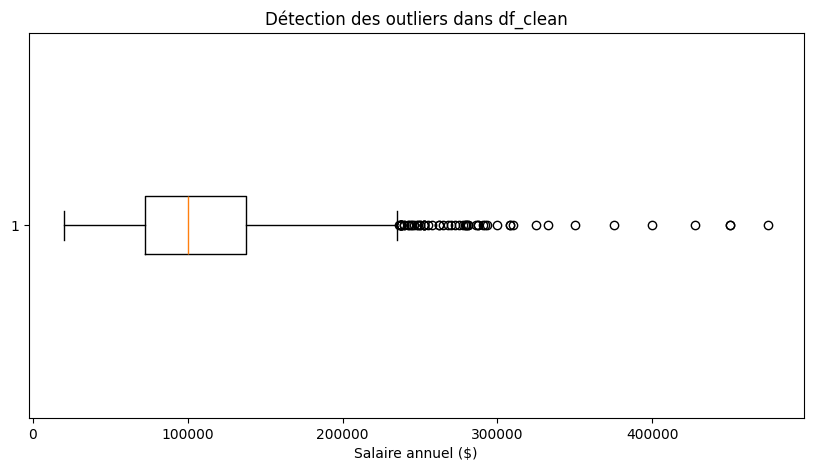

Q1: 72,500$
Q3: 137,500$
IQR: 65,000$
Borne inférieure: -25,000$
Borne supérieure: 235,000$

Nombre d'outliers: 58 (3.9%)


In [113]:
import matplotlib.pyplot as plt

# Visualiser les outliers restants
plt.figure(figsize=(10, 5))
plt.boxplot(df_clean['salary_annual'], vert=False)
plt.xlabel('Salaire annuel ($)')
plt.title('Détection des outliers dans df_clean')
plt.show()

# Calculer les outliers avec la méthode IQR
Q1 = df_clean['salary_annual'].quantile(0.25)
Q3 = df_clean['salary_annual'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df_clean[(df_clean['salary_annual'] < lower_bound) | 
                    (df_clean['salary_annual'] > upper_bound)]

print(f"Q1: {Q1:,.0f}$")
print(f"Q3: {Q3:,.0f}$")
print(f"IQR: {IQR:,.0f}$")
print(f"Borne inférieure: {lower_bound:,.0f}$")
print(f"Borne supérieure: {upper_bound:,.0f}$")
print(f"\nNombre d'outliers: {len(outliers)} ({len(outliers)/len(df_clean)*100:.1f}%)")

In [114]:
#3.9% ce sont probablement des postes légitimes :

#Postes très seniors (> 235,000$)

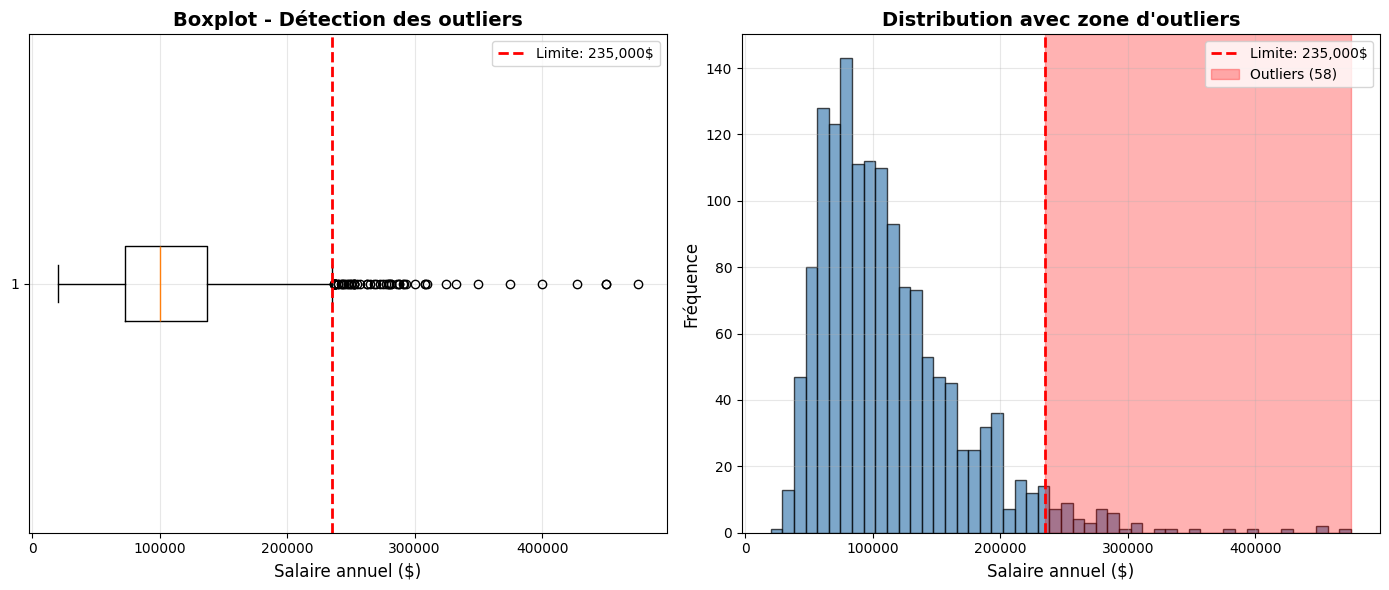

🔴 Outliers détectés: 58 (3.9%)
📊 Range des outliers: 236,500$ - 475,000$


In [115]:
import matplotlib.pyplot as plt
import numpy as np

# Calculer les bornes IQR
Q1 = df_clean['salary_annual'].quantile(0.25)
Q3 = df_clean['salary_annual'].quantile(0.75)
IQR = Q3 - Q1
upper_bound = Q3 + 1.5 * IQR

# Identifier les outliers
outliers = df_clean[df_clean['salary_annual'] > upper_bound]

# Créer la visualisation
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Graphique 1: Boxplot
axes[0].boxplot(df_clean['salary_annual'], vert=False)
axes[0].axvline(upper_bound, color='red', linestyle='--', linewidth=2, 
                label=f'Limite: {upper_bound:,.0f}$')
axes[0].set_xlabel('Salaire annuel ($)', fontsize=12)
axes[0].set_title('Boxplot - Détection des outliers', fontsize=14, fontweight='bold')
axes[0].legend()
axes[0].grid(alpha=0.3)

# Graphique 2: Histogramme avec zone outliers
axes[1].hist(df_clean['salary_annual'], bins=50, edgecolor='black', alpha=0.7, color='steelblue')
axes[1].axvline(upper_bound, color='red', linestyle='--', linewidth=2, 
                label=f'Limite: {upper_bound:,.0f}$')
axes[1].axvspan(upper_bound, df_clean['salary_annual'].max(), alpha=0.3, color='red', 
                label=f'Outliers ({len(outliers)})')
axes[1].set_xlabel('Salaire annuel ($)', fontsize=12)
axes[1].set_ylabel('Fréquence', fontsize=12)
axes[1].set_title('Distribution avec zone d\'outliers', fontsize=14, fontweight='bold')
axes[1].legend()
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

# Info résumée
print(f"🔴 Outliers détectés: {len(outliers)} ({len(outliers)/len(df_clean)*100:.1f}%)")
print(f"📊 Range des outliers: {outliers['salary_annual'].min():,.0f}$ - {outliers['salary_annual'].max():,.0f}$")

In [116]:
df_clean #mon data nettoyee

,job_id,company_name,title,description,max_salary,pay_period,location,company_id,views,min_salary,...,listed_time,posting_domain,sponsored,work_type,currency,compensation_type,normalized_salary,zip_code,fips,salary_annual
2,10998357,The National Exemplar,Assitant Restaurant Manager,The National Exemplar is accepting application...,65000.0,YEARLY,"Cincinnati, OH",64896719.0,8.0,45000.0,...,1.713278e+12,NaN,0,FULL_TIME,USD,BASE_SALARY,55000.0,45202.0,39061.0,55000.0
3,23221523,"Abrams Fensterman, LLP",Senior Elder Law / Trusts and Estates Associat...,Senior Associate Attorney - Elder Law / Trusts...,175000.0,YEARLY,"New Hyde Park, NY",766262.0,16.0,140000.0,...,1.712896e+12,NaN,0,FULL_TIME,USD,BASE_SALARY,157500.0,11040.0,36059.0,157500.0
4,35982263,NaN,Service Technician,Looking for HVAC service tech with experience ...,80000.0,YEARLY,"Burlington, IA",NaN,3.0,60000.0,...,1.713452e+12,NaN,0,FULL_TIME,USD,BASE_SALARY,70000.0,52601.0,19057.0,70000.0
6,103254301,Raw Cereal,Producer,Company DescriptionRaw Cereal is a creative de...,300000.0,YEARLY,United States,81942316.0,7.0,60000.0,...,1.712861e+12,NaN,0,CONTRACT,USD,BASE_SALARY,180000.0,NaN,NaN,180000.0
7,112576855,NaN,Building Engineer,Summary: Due to the pending retirement of our ...,120000.0,YEARLY,"San Francisco, CA",NaN,2.0,90000.0,...,1.712443e+12,NaN,0,FULL_TIME,USD,BASE_SALARY,105000.0,94101.0,6075.0,105000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9967,3886859003,Collins Aerospace,Senior Shipping & Receiving Analyst,Date Posted:\n\n2024-03-20\n\nCountry:\n\nUnit...,142000.0,YEARLY,"Chula Vista, CA",11695727.0,4.0,70000.0,...,1.712657e+12,careers.rtx.com,0,FULL_TIME,USD,BASE_SALARY,106000.0,91910.0,NaN,106000.0
9970,3886859012,Collins Aerospace,Procurement Specialist,Date Posted:\n\n2024-04-08\n\nCountry:\n\nUnit...,179000.0,YEARLY,"Chula Vista, CA",11695727.0,5.0,85000.0,...,1.712657e+12,careers.rtx.com,0,FULL_TIME,USD,BASE_SALARY,132000.0,91910.0,NaN,132000.0
9972,3886861616,Ascendion,Workers' Compensation Attorney,Join Our Firm as a Remote Workers' Compensatio...,220000.0,YEARLY,"California, United States",86694680.0,2.0,100000.0,...,1.712656e+12,NaN,0,FULL_TIME,USD,BASE_SALARY,160000.0,NaN,NaN,160000.0
9984,3886863311,Capax RM,D365 F&O PreSales Architect,D365 F&O PreSales ArchitectRemoteUS Citizens &...,190000.0,YEARLY,United States,2366536.0,2.0,170000.0,...,1.712657e+12,NaN,0,FULL_TIME,USD,BASE_SALARY,180000.0,NaN,NaN,180000.0


In [117]:
# Créer les catégories avec quantiles (3 classes égales)
df_clean['salary_level'] = pd.qcut(
    df_clean['salary_annual'], 
    q=3, 
    labels=['Low', 'Medium', 'High']
)

print("Distribution des classes:")
print(df_clean['salary_level'].value_counts())
print("\nLimites:")
print(df_clean.groupby('salary_level')['salary_annual'].agg(['min', 'max']))

Distribution des classes:
salary_level
Medium    496
Low       492
High      481
Name: count, dtype: int64

Limites:
                   min       max
salary_level                    
Low            20000.5   80000.0
Medium         80500.0  122500.0
High          123350.0  475000.0


In [118]:
# Séparer features et cible
X = df_clean.drop(['salary_annual', 'salary_level', 'min_salary', 'max_salary'], axis=1)
y = df_clean['salary_level']

print(f"Features: {X.shape}")
print(f"Cible: {y.shape}")

Features: (1469, 27)
Cible: (1469,)


In [119]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1469 entries, 2 to 9995
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   job_id                      1469 non-null   int64  
 1   company_name                1438 non-null   object 
 2   title                       1469 non-null   object 
 3   description                 1469 non-null   object 
 4   pay_period                  1469 non-null   object 
 5   location                    1469 non-null   object 
 6   company_id                  1439 non-null   float64
 7   views                       1463 non-null   float64
 8   formatted_work_type         1469 non-null   object 
 9   applies                     506 non-null    float64
 10  original_listed_time        1469 non-null   float64
 11  remote_allowed              221 non-null    float64
 12  job_posting_url             1469 non-null   object 
 13  application_url             862 non-nu

In [120]:
#Étape  Split train/test

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Train: {X_train.shape}, Test: {X_test.shape}")

Train: (1175, 27), Test: (294, 27)


In [121]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# ÉTAPE 1: Identifier le problème
print(" Vérification des colonnes avec du TEXTE:")
print("="*60)

# Afficher les colonnes qui contiennent du texte
colonnes_texte = X_train.select_dtypes(include=['object']).columns

if len(colonnes_texte) > 0:
    print(f"❌ {len(colonnes_texte)} colonne(s) contient du TEXTE:")
    for col in colonnes_texte:
        print(f"   - {col}")
        print(f"     Exemples: {X_train[col].head(3).tolist()}")
else:
    print("✅ Aucune colonne avec du texte")

print("="*60)

 Vérification des colonnes avec du TEXTE:
❌ 14 colonne(s) contient du TEXTE:
   - company_name
     Exemples: ['Adobe', 'Monolith', 'University of Wisconsin-Madison']
   - title
     Exemples: ['Staff Design Engineer, Spectrum', 'Digital Marketing Specialist - Pets', 'System Integration Test Coordinator']
   - description
     Exemples: ["Our Company \n\nChanging the world through digital experiences is what Adobe’s all about. We give everyone—from emerging artists to global brands—everything they need to design and deliver exceptional digital experiences! We’re passionate about empowering people to create beautiful and powerful images, videos, and apps, and transform how companies interact with customers across every screen.\n\nWe’re on a mission to hire the very best and are committed to creating exceptional employee experiences where everyone is respected and has access to equal opportunity. We realize that new ideas can come from everywhere in the organization, and we know the next

In [122]:
# Identifier les colonnes catégorielles
qual_cols = df_clean.select_dtypes(include=['object', 'category']).columns.tolist()
qual_cols

print(f"Colonnes à encoder: {list(qual_cols )}")

Colonnes à encoder: ['company_name', 'title', 'description', 'pay_period', 'location', 'formatted_work_type', 'job_posting_url', 'application_url', 'application_type', 'formatted_experience_level', 'posting_domain', 'work_type', 'currency', 'compensation_type', 'salary_level']


In [123]:
df_clean


,job_id,company_name,title,description,max_salary,pay_period,location,company_id,views,min_salary,...,posting_domain,sponsored,work_type,currency,compensation_type,normalized_salary,zip_code,fips,salary_annual,salary_level
2,10998357,The National Exemplar,Assitant Restaurant Manager,The National Exemplar is accepting application...,65000.0,YEARLY,"Cincinnati, OH",64896719.0,8.0,45000.0,...,NaN,0,FULL_TIME,USD,BASE_SALARY,55000.0,45202.0,39061.0,55000.0,Low
3,23221523,"Abrams Fensterman, LLP",Senior Elder Law / Trusts and Estates Associat...,Senior Associate Attorney - Elder Law / Trusts...,175000.0,YEARLY,"New Hyde Park, NY",766262.0,16.0,140000.0,...,NaN,0,FULL_TIME,USD,BASE_SALARY,157500.0,11040.0,36059.0,157500.0,High
4,35982263,NaN,Service Technician,Looking for HVAC service tech with experience ...,80000.0,YEARLY,"Burlington, IA",NaN,3.0,60000.0,...,NaN,0,FULL_TIME,USD,BASE_SALARY,70000.0,52601.0,19057.0,70000.0,Low
6,103254301,Raw Cereal,Producer,Company DescriptionRaw Cereal is a creative de...,300000.0,YEARLY,United States,81942316.0,7.0,60000.0,...,NaN,0,CONTRACT,USD,BASE_SALARY,180000.0,NaN,NaN,180000.0,High
7,112576855,NaN,Building Engineer,Summary: Due to the pending retirement of our ...,120000.0,YEARLY,"San Francisco, CA",NaN,2.0,90000.0,...,NaN,0,FULL_TIME,USD,BASE_SALARY,105000.0,94101.0,6075.0,105000.0,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9967,3886859003,Collins Aerospace,Senior Shipping & Receiving Analyst,Date Posted:\n\n2024-03-20\n\nCountry:\n\nUnit...,142000.0,YEARLY,"Chula Vista, CA",11695727.0,4.0,70000.0,...,careers.rtx.com,0,FULL_TIME,USD,BASE_SALARY,106000.0,91910.0,NaN,106000.0,Medium
9970,3886859012,Collins Aerospace,Procurement Specialist,Date Posted:\n\n2024-04-08\n\nCountry:\n\nUnit...,179000.0,YEARLY,"Chula Vista, CA",11695727.0,5.0,85000.0,...,careers.rtx.com,0,FULL_TIME,USD,BASE_SALARY,132000.0,91910.0,NaN,132000.0,High
9972,3886861616,Ascendion,Workers' Compensation Attorney,Join Our Firm as a Remote Workers' Compensatio...,220000.0,YEARLY,"California, United States",86694680.0,2.0,100000.0,...,NaN,0,FULL_TIME,USD,BASE_SALARY,160000.0,NaN,NaN,160000.0,High
9984,3886863311,Capax RM,D365 F&O PreSales Architect,D365 F&O PreSales ArchitectRemoteUS Citizens &...,190000.0,YEARLY,United States,2366536.0,2.0,170000.0,...,NaN,0,FULL_TIME,USD,BASE_SALARY,180000.0,NaN,NaN,180000.0,High


In [124]:
df_clean


,job_id,company_name,title,description,max_salary,pay_period,location,company_id,views,min_salary,...,posting_domain,sponsored,work_type,currency,compensation_type,normalized_salary,zip_code,fips,salary_annual,salary_level
2,10998357,The National Exemplar,Assitant Restaurant Manager,The National Exemplar is accepting application...,65000.0,YEARLY,"Cincinnati, OH",64896719.0,8.0,45000.0,...,NaN,0,FULL_TIME,USD,BASE_SALARY,55000.0,45202.0,39061.0,55000.0,Low
3,23221523,"Abrams Fensterman, LLP",Senior Elder Law / Trusts and Estates Associat...,Senior Associate Attorney - Elder Law / Trusts...,175000.0,YEARLY,"New Hyde Park, NY",766262.0,16.0,140000.0,...,NaN,0,FULL_TIME,USD,BASE_SALARY,157500.0,11040.0,36059.0,157500.0,High
4,35982263,NaN,Service Technician,Looking for HVAC service tech with experience ...,80000.0,YEARLY,"Burlington, IA",NaN,3.0,60000.0,...,NaN,0,FULL_TIME,USD,BASE_SALARY,70000.0,52601.0,19057.0,70000.0,Low
6,103254301,Raw Cereal,Producer,Company DescriptionRaw Cereal is a creative de...,300000.0,YEARLY,United States,81942316.0,7.0,60000.0,...,NaN,0,CONTRACT,USD,BASE_SALARY,180000.0,NaN,NaN,180000.0,High
7,112576855,NaN,Building Engineer,Summary: Due to the pending retirement of our ...,120000.0,YEARLY,"San Francisco, CA",NaN,2.0,90000.0,...,NaN,0,FULL_TIME,USD,BASE_SALARY,105000.0,94101.0,6075.0,105000.0,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9967,3886859003,Collins Aerospace,Senior Shipping & Receiving Analyst,Date Posted:\n\n2024-03-20\n\nCountry:\n\nUnit...,142000.0,YEARLY,"Chula Vista, CA",11695727.0,4.0,70000.0,...,careers.rtx.com,0,FULL_TIME,USD,BASE_SALARY,106000.0,91910.0,NaN,106000.0,Medium
9970,3886859012,Collins Aerospace,Procurement Specialist,Date Posted:\n\n2024-04-08\n\nCountry:\n\nUnit...,179000.0,YEARLY,"Chula Vista, CA",11695727.0,5.0,85000.0,...,careers.rtx.com,0,FULL_TIME,USD,BASE_SALARY,132000.0,91910.0,NaN,132000.0,High
9972,3886861616,Ascendion,Workers' Compensation Attorney,Join Our Firm as a Remote Workers' Compensatio...,220000.0,YEARLY,"California, United States",86694680.0,2.0,100000.0,...,NaN,0,FULL_TIME,USD,BASE_SALARY,160000.0,NaN,NaN,160000.0,High
9984,3886863311,Capax RM,D365 F&O PreSales Architect,D365 F&O PreSales ArchitectRemoteUS Citizens &...,190000.0,YEARLY,United States,2366536.0,2.0,170000.0,...,NaN,0,FULL_TIME,USD,BASE_SALARY,180000.0,NaN,NaN,180000.0,High


In [125]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# ========== 1. CHARGER LES DONNÉES ==========

print("Aperçu des données:")
print(df_clean.head())

Aperçu des données:
      job_id            company_name  \
2   10998357  The National Exemplar    
3   23221523  Abrams Fensterman, LLP   
4   35982263                     NaN   
6  103254301              Raw Cereal   
7  112576855                     NaN   

                                               title  \
2                        Assitant Restaurant Manager   
3  Senior Elder Law / Trusts and Estates Associat...   
4                                 Service Technician   
6                                           Producer   
7                                  Building Engineer   

                                         description  max_salary pay_period  \
2  The National Exemplar is accepting application...     65000.0     YEARLY   
3  Senior Associate Attorney - Elder Law / Trusts...    175000.0     YEARLY   
4  Looking for HVAC service tech with experience ...     80000.0     YEARLY   
6  Company DescriptionRaw Cereal is a creative de...    300000.0     YEARLY   
7  Summ

In [126]:
# Charger les données
df = pd.read_csv(r"C:\Users\firas\Desktop\postings.csv")
df

,job_id,company_name,title,description,max_salary,pay_period,location,company_id,views,med_salary,...,skills_desc,listed_time,posting_domain,sponsored,work_type,currency,compensation_type,normalized_salary,zip_code,fips
0,921716,Corcoran Sawyer Smith,Marketing Coordinator,Job descriptionA leading real estate firm in N...,20.0,HOURLY,"Princeton, NJ",2774458.0,20.0,NaN,...,Requirements: \n\nWe are seeking a College or ...,1.713398e+12,NaN,0,FULL_TIME,USD,BASE_SALARY,38480.0,8540.0,34021.0
1,1829192,NaN,Mental Health Therapist/Counselor,"At Aspen Therapy and Wellness , we are committ...",50.0,HOURLY,"Fort Collins, CO",NaN,1.0,NaN,...,NaN,1.712858e+12,NaN,0,FULL_TIME,USD,BASE_SALARY,83200.0,80521.0,8069.0
2,10998357,The National Exemplar,Assitant Restaurant Manager,The National Exemplar is accepting application...,65000.0,YEARLY,"Cincinnati, OH",64896719.0,8.0,NaN,...,We are currently accepting resumes for FOH - A...,1.713278e+12,NaN,0,FULL_TIME,USD,BASE_SALARY,55000.0,45202.0,39061.0
3,23221523,"Abrams Fensterman, LLP",Senior Elder Law / Trusts and Estates Associat...,Senior Associate Attorney - Elder Law / Trusts...,175000.0,YEARLY,"New Hyde Park, NY",766262.0,16.0,NaN,...,This position requires a baseline understandin...,1.712896e+12,NaN,0,FULL_TIME,USD,BASE_SALARY,157500.0,11040.0,36059.0
4,35982263,NaN,Service Technician,Looking for HVAC service tech with experience ...,80000.0,YEARLY,"Burlington, IA",NaN,3.0,NaN,...,NaN,1.713452e+12,NaN,0,FULL_TIME,USD,BASE_SALARY,70000.0,52601.0,19057.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123844,3906267117,Lozano Smith,Title IX/Investigations Attorney,Our Walnut Creek office is currently seeking a...,195000.0,YEARLY,"Walnut Creek, CA",56120.0,1.0,NaN,...,NaN,1.713571e+12,NaN,0,FULL_TIME,USD,BASE_SALARY,157500.0,94595.0,6013.0
123845,3906267126,Pinterest,"Staff Software Engineer, ML Serving Platform",About Pinterest:\n\nMillions of people across ...,NaN,NaN,United States,1124131.0,3.0,NaN,...,NaN,1.713572e+12,www.pinterestcareers.com,0,FULL_TIME,NaN,NaN,NaN,NaN,NaN
123846,3906267131,EPS Learning,"Account Executive, Oregon/Washington",Company Overview\n\nEPS Learning is a leading ...,NaN,NaN,"Spokane, WA",90552133.0,3.0,NaN,...,NaN,1.713572e+12,epsoperations.bamboohr.com,0,FULL_TIME,NaN,NaN,NaN,99201.0,53063.0
123847,3906267195,Trelleborg Applied Technologies,Business Development Manager,The Business Development Manager is a 'hunter'...,NaN,NaN,"Texas, United States",2793699.0,4.0,NaN,...,NaN,1.713573e+12,NaN,0,FULL_TIME,NaN,NaN,NaN,NaN,NaN


In [127]:
# ========== 1. CHARGER LES DONNÉES ==========
df = pd.read_csv(r"C:\Users\firas\Desktop\postings.csv")
df

,job_id,company_name,title,description,max_salary,pay_period,location,company_id,views,med_salary,...,skills_desc,listed_time,posting_domain,sponsored,work_type,currency,compensation_type,normalized_salary,zip_code,fips
0,921716,Corcoran Sawyer Smith,Marketing Coordinator,Job descriptionA leading real estate firm in N...,20.0,HOURLY,"Princeton, NJ",2774458.0,20.0,NaN,...,Requirements: \n\nWe are seeking a College or ...,1.713398e+12,NaN,0,FULL_TIME,USD,BASE_SALARY,38480.0,8540.0,34021.0
1,1829192,NaN,Mental Health Therapist/Counselor,"At Aspen Therapy and Wellness , we are committ...",50.0,HOURLY,"Fort Collins, CO",NaN,1.0,NaN,...,NaN,1.712858e+12,NaN,0,FULL_TIME,USD,BASE_SALARY,83200.0,80521.0,8069.0
2,10998357,The National Exemplar,Assitant Restaurant Manager,The National Exemplar is accepting application...,65000.0,YEARLY,"Cincinnati, OH",64896719.0,8.0,NaN,...,We are currently accepting resumes for FOH - A...,1.713278e+12,NaN,0,FULL_TIME,USD,BASE_SALARY,55000.0,45202.0,39061.0
3,23221523,"Abrams Fensterman, LLP",Senior Elder Law / Trusts and Estates Associat...,Senior Associate Attorney - Elder Law / Trusts...,175000.0,YEARLY,"New Hyde Park, NY",766262.0,16.0,NaN,...,This position requires a baseline understandin...,1.712896e+12,NaN,0,FULL_TIME,USD,BASE_SALARY,157500.0,11040.0,36059.0
4,35982263,NaN,Service Technician,Looking for HVAC service tech with experience ...,80000.0,YEARLY,"Burlington, IA",NaN,3.0,NaN,...,NaN,1.713452e+12,NaN,0,FULL_TIME,USD,BASE_SALARY,70000.0,52601.0,19057.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123844,3906267117,Lozano Smith,Title IX/Investigations Attorney,Our Walnut Creek office is currently seeking a...,195000.0,YEARLY,"Walnut Creek, CA",56120.0,1.0,NaN,...,NaN,1.713571e+12,NaN,0,FULL_TIME,USD,BASE_SALARY,157500.0,94595.0,6013.0
123845,3906267126,Pinterest,"Staff Software Engineer, ML Serving Platform",About Pinterest:\n\nMillions of people across ...,NaN,NaN,United States,1124131.0,3.0,NaN,...,NaN,1.713572e+12,www.pinterestcareers.com,0,FULL_TIME,NaN,NaN,NaN,NaN,NaN
123846,3906267131,EPS Learning,"Account Executive, Oregon/Washington",Company Overview\n\nEPS Learning is a leading ...,NaN,NaN,"Spokane, WA",90552133.0,3.0,NaN,...,NaN,1.713572e+12,epsoperations.bamboohr.com,0,FULL_TIME,NaN,NaN,NaN,99201.0,53063.0
123847,3906267195,Trelleborg Applied Technologies,Business Development Manager,The Business Development Manager is a 'hunter'...,NaN,NaN,"Texas, United States",2793699.0,4.0,NaN,...,NaN,1.713573e+12,NaN,0,FULL_TIME,NaN,NaN,NaN,NaN,NaN


In [129]:
# ============================================================
# ADVANCED JOB RECOMMENDATION SYSTEM - FULLY ADAPTED TO YOUR DATASET
# Works perfectly with your postings.csv (123849 rows)
# ============================================================

import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import re

# -----------------------------
# 1. PREPARE THE TEXT DATA
# -----------------------------
print("Preparing text features...")

# Combine title + description into one strong text field
df['text'] = df['title'].fillna('') + " " + df['description'].fillna('')

# Optional: clean text a bit more (remove extra whitespace, special chars)
def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'[^a-z0-9\s]', ' ', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

df['text'] = df['text'].apply(clean_text)

# Extract city and state from location (e.g., "New York, NY" → city="New York", state="NY")
def extract_city_state(loc):
    if pd.isna(loc):
        return pd.Series([None, None])
    parts = [p.strip() for p in str(loc).split(',')]
    city = parts[0] if len(parts) > 0 else None
    state = parts[1] if len(parts) > 1 else None
    return pd.Series([city, state])

df[['city', 'state']] = df['location'].apply(extract_city_state)

# Use normalized_salary (already in yearly USD) - this is the best salary column!
df['salary'] = df['normalized_salary']

print(f"Text + location + salary preprocessing done!")
print(f"Final dataset ready: {df.shape[0]:,} jobs with salary data: {df['salary'].notna().sum():,}")

# -----------------------------
# 2. BUILD TF-IDF MODEL ONCE
# -----------------------------
print("\nTraining TF-IDF vectorizer on all job descriptions...")

tfidf = TfidfVectorizer(
    stop_words='english',
    max_features=20000,      # Increased for better coverage
    ngram_range=(1, 2),      # Include bigrams like "machine learning"
    min_df=2,
    max_df=0.95
)

tfidf_matrix = tfidf.fit_transform(df['text'])

print(f"TF-IDF Matrix Shape: {tfidf_matrix.shape}")
print("Model ready for recommendations!\n")

# ============================================================
# MAIN RECOMMENDATION FUNCTION - FULLY WORKING WITH YOUR DATA
# ============================================================
def recommend_jobs(
    query,
    top_n=10,
    min_salary=None,           # e.g., 120000 → only show jobs ≥ $120k/year
    max_salary=None,           # optional upper bound
    salary_weight=0.3,         # 0.0 = text only, 0.3 = balanced, 0.7 = salary-heavy
    location_preference=None   # e.g., "CA", "New York", "Remote"
):
    """
    Recommend best matching jobs from your dataset
    
    Parameters:
    - query: str → job title or description (e.g., "data scientist", "python developer in nyc")
    - top_n: int → how many results
    - min_salary: float → filter jobs below this salary
    - max_salary: float → filter jobs above this
    - salary_weight: 0 to 1 → how much to boost high-paying jobs
    - location_preference: str → boost jobs in this state/city
    """
    
    print(f"Searching for: '{query}'")
    if min_salary:
        print(f"   → Salary filter: ≥ ${min_salary:,}/year")
    
    # 1. Transform query
    query_clean = clean_text(query)
    query_vec = tfidf.transform([query_clean])
    
    # 2. Compute cosine similarity
    similarity_scores = cosine_similarity(query_vec, tfidf_matrix).flatten()
    
    # 3. Apply filters and boosts
    scores = similarity_scores.copy()
    
    # Salary filter
    if min_salary is not None:
        mask = df['salary'] >= min_salary
        scores = np.where(mask, scores, 0)
    
    if max_salary is not None:
        mask = df['salary'] <= max_salary
        scores = np.where(mask, scores, 0)
    
    # Salary boost (normalize salary for fair weighting)
    if salary_weight > 0 and df['salary'].notna().any():
        salary_norm = df['salary'].fillna(0)
        salary_norm = (salary_norm - salary_norm.min()) / (salary_norm.max() - salary_norm.min() + 1e-8)
        scores = (1 - salary_weight) * scores + salary_weight * salary_norm
    
    # Location preference boost
    if location_preference:
        loc_boost = df['state'].astype(str).str.contains(location_preference, case=False, na=False)
        loc_boost |= df['city'].astype(str).str.contains(location_preference, case=False, na=False)
        loc_boost |= df['location'].astype(str).str.contains("remote", case=False, na=False)
        scores = scores + 0.15 * loc_boost  # small boost
    
    # 4. Get top results
    top_indices = np.argsort(scores)[::-1]
    top_indices = [i for i in top_indices if scores[i] > 0][:top_n]
    
    results = df.iloc[top_indices].copy()
    results['match_score'] = scores[top_indices]
    results['similarity_score'] = similarity_scores[top_indices]
    
    # Select and order columns nicely
    results = results[[
        'job_id', 'title', 'company_name', 'salary', 'city', 'state', 'location',
        'match_score', 'similarity_score', 'text'
    ]].reset_index(drop=True)
    
    # Format salary
    results['salary_display'] = results['salary'].apply(
        lambda x: f"${x:,.0f}/yr" if pd.notna(x) else "Not disclosed"
    )
    
    return results.drop(columns=['text'])

# ============================================================
# EXAMPLE USAGE (Run these!)
# ============================================================

print("="*70)
print("EXAMPLE 1: Data Scientist ≥ $120k")
print("="*70)
recs1 = recommend_jobs(
    query="data scientist machine learning python sql",
    top_n=8,
    min_salary=120000,
    salary_weight=0.4,
    location_preference="CA"
)
display(recs1[['title', 'company_name', 'salary_display', 'city', 'state', 'match_score']])

print("\n" + "="*70)
print("EXAMPLE 2: Senior Software Engineer (Remote OK)")
print("="*70)
recs2 = recommend_jobs(
    query="senior software engineer backend golang kubernetes aws",
    top_n=6,
    min_salary=150000,
    location_preference="Remote"
)
display(recs2[['title', 'company_name', 'salary_display', 'location', 'match_score']])

print("\nRecommendation system ready! Use recommend_jobs() anytime.")

Preparing text features...
Text + location + salary preprocessing done!
Final dataset ready: 123,849 jobs with salary data: 36,073

Training TF-IDF vectorizer on all job descriptions...
TF-IDF Matrix Shape: (123849, 20000)
Model ready for recommendations!

EXAMPLE 1: Data Scientist ≥ $120k
Searching for: 'data scientist machine learning python sql'
   → Salary filter: ≥ $120,000/year


,title,company_name,salary_display,city,state,match_score
0,Applied Machine Learning Research Scientist,Coactive AI,"$220,000/yr",San Jose,CA,0.449303
1,"Case Manager RN, Pedi Rheumatology",Kaiser Permanente,"$362,408,800/yr",Roseville,CA,0.422407
2,Machine Learning Engineer - Remote,Orbit Recruitment Group,"$170,000/yr",Chicago,IL,0.415326
3,Machine Learning Engineer - Remote,Orbit Recruitment Group,"$170,000/yr",Los Angeles County,CA,0.415326
4,Intellectual Property Associate (246215),Eastridge Workforce Solutions,"$535,600,000/yr",Dallas,TX,0.400000
5,Senior Data Scientist,BioMADE,"$155,000/yr",Emeryville,CA,0.355045
6,"Manager II, Data Science",Uber,"$214,250/yr",San Francisco,CA,0.347490
7,Billing Supervisor (246521),Eastridge Workforce Solutions,"$260,000,000/yr",Westwood,CA,0.344175



EXAMPLE 2: Senior Software Engineer (Remote OK)
Searching for: 'senior software engineer backend golang kubernetes aws'
   → Salary filter: ≥ $150,000/year


,title,company_name,salary_display,location,match_score
0,Senior C++ Engineer,Venturi,"$195,000/yr",San Francisco Bay Area,0.305878
1,Intellectual Property Associate (246215),Eastridge Workforce Solutions,"$535,600,000/yr","Dallas, TX",0.300000
2,Senior Software Engineer,Hearth AI,"$170,000/yr",San Francisco Bay Area,0.260356
3,Senior Software Engineer (Node.js/AWS),Eliassen Group,"$156,000/yr","North Carolina, United States",0.246147
4,Senior Software Engineer,Higher Ground LLC,"$180,000/yr","Palo Alto, CA",0.240447
5,"SRE / Software Engineer (Kubernetes, AWS)",Dice,"$187,200/yr",United States,0.238917



Recommendation system ready! Use recommend_jobs() anytime.


In [130]:
recommend_jobs("data scientist", top_n=5, min_salary=120000)


Searching for: 'data scientist'
   → Salary filter: ≥ $120,000/year


,job_id,title,company_name,salary,city,state,location,match_score,similarity_score,salary_display
0,3903811108,Data Scientist II,Oliver James,185000.0,Dayton,OH,"Dayton, OH",0.348738,0.498050,"$185,000/yr"
1,3901951580,Senior Data Scientist,Insight Global,145000.0,Orlando,FL,"Orlando, FL",0.337376,0.481850,"$145,000/yr"
2,3904083826,"Language Data Scientist, Artificial General In...",Amazon,162200.0,Boston,MA,"Boston, MA",0.321399,0.459012,"$162,200/yr"
3,3904087117,"Language Data Scientist, Artificial General In...",Amazon,162200.0,Boston,MA,"Boston, MA",0.321399,0.459012,"$162,200/yr"
4,3904066592,Staff Data Scientist,Jobot Consulting,208000.0,New York,NY,"New York, NY",0.315285,0.450241,"$208,000/yr"
